Going to model the data here.

 final_simplex: (array([[29932.614125 ],
       [29932.6140625]]), array([1.55486242e-09, 1.55486242e-09]))
           fun: 1.5548624209161554e-09
       message: 'Optimization terminated successfully.'
          nfev: 134
           nit: 66
        status: 0
       success: True
             x: array([29932.614125])


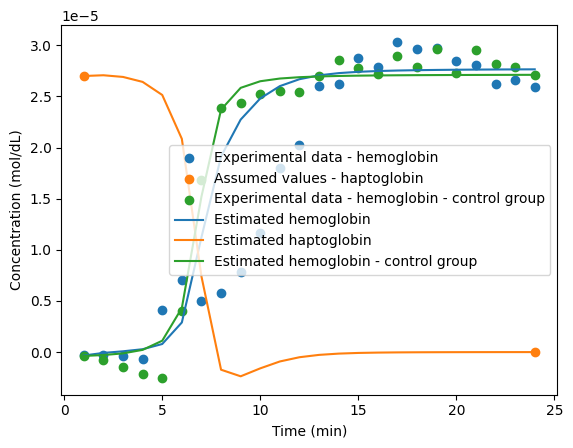

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')

time = np.linspace(1, 24, 24)
hbin = 2.7E-5
hpin = hbin
hpx = [1, 24]
hpy = [hpin, 0]
ic = ([data.loc[0, "hpadj mol/dL"], hpin, data.loc[0, "cadj mol/dL"]])
ac = (10E-3)
s=1.38476998e-05
mu=6.86142089e+00

def func(x, t, kr):
    B, P, C = x
    dB = - kr * B * P + s/((((t-mu)**2)+1)**(3/2))
    dP = - kr * B * P - s/((((t-mu)**2)+1)**(3/2))
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

def err(kr):
    ODEoutput = odeint(func, ic, time, args = (kr,))
    errB = (ODEoutput[:,0] - data["hpadj mol/dL"])**2
    errP = (np.array(ODEoutput[0,1], ODEoutput[23, 1]) - np.array(hpy))**2
    errC = (ODEoutput[:,2] - data["cadj mol/dL"])**2
    return (np.sum(errB) + np.sum(errC) + np.sum(errP))

sol = minimize(err, x0 = ac, method = "Nelder-Mead")
print(sol)

fitdata = odeint(func, ic, data["time"], args=(sol.x[0],))
#print(fitdata)
plt.scatter(data["time"], data['hpadj mol/dL'], label = "Experimental data - hemoglobin")
plt.scatter(hpx, hpy, label = "Assumed values - haptoglobin")
plt.scatter(data["time"], data['cadj mol/dL'], label = "Experimental data - hemoglobin - control group")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.plot(data["time"], fitdata[:,2], label = "Estimated hemoglobin - control group")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend(loc = "right")

In [43]:
# plotdf(func, # Function giving the rhs of the diff. eq. system
#      np.array([0,200]), # [xmin,xmax]
#      np.array([0,200]),# [ymin,ymax]
#      [(0,150)], # list of initial values for trajectories (optional)
#      # Additional parameters for `f` (optional)
#      parameters={"GB":50,"kr":0.3,"GP":0.01},
#      gridsteps=20,
#      nsteps = 10000,
#      tmax=20)

# plt.xlabel("B, concentration of hemoglobin (g/dL)")
# plt.ylabel("P, concentration of haptoglobin (g/dL)")

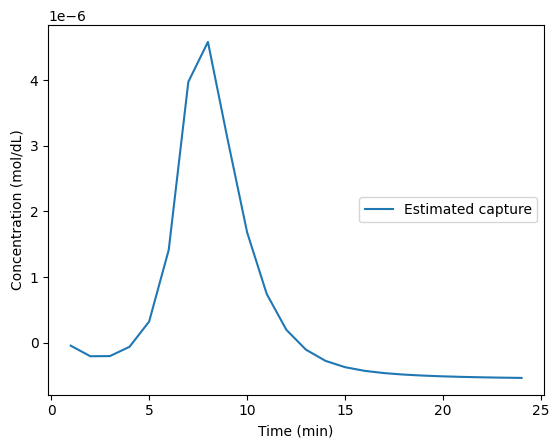

In [44]:
capdata = fitdata[:,2] - fitdata[:,0]

plt.plot(data["time"], capdata, label = "Estimated capture")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend(loc = "right")